Taking instructions from the example found on http://darribas.org/gds15/labs/Lab_08.html, re: http://darribas.org/gds_scipy16/ipynb_md/07_spatial_clustering.html.

First I'll start by reading in the data. I think I'll just look at Chicago to begin with:

In [2]:
# importing recommended libraries

%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pysal as ps
import geopandas as gpd
from sklearn import cluster
from sklearn.preprocessing import scale

sns.set(style="whitegrid")


/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


## Chicago

In [3]:
chi_inc_geojson = '/Users/fionaedwardson/Documents/GitHub/GISIII_Final_Project/city_income_data/inc_data_geojson/chi/chi_inc.geojson'

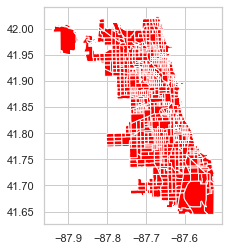

In [4]:
chi_inc = gpd.read_file(chi_inc_geojson)
chi_inc.plot(color='red')

Nice! The CRS looks good too.

Now, let's follow the recommendation of the lab and plot the data as a univariate map.

First I'll look at the data...

In [5]:
print(chi_inc)

     med_earn city_name                                           geometry
0     32321.0       chi  POLYGON ((-87.62433 41.74365, -87.62417 41.736...
1     34671.0       chi  POLYGON ((-87.59062 41.72952, -87.58871 41.726...
2     54606.0       chi  POLYGON ((-87.64060 41.95364, -87.64074 41.953...
3     62745.0       chi  POLYGON ((-87.64180 41.93498, -87.64139 41.934...
4     25571.0       chi  POLYGON ((-87.72286 41.78230, -87.72276 41.778...
..        ...       ...                                                ...
865   31359.0       chi  POLYGON ((-87.67790 41.74288, -87.67725 41.741...
866   50885.0       chi  POLYGON ((-87.80122 41.78476, -87.80122 41.784...
867   35464.0       chi  MULTIPOLYGON (((-87.68070 41.67726, -87.68070 ...
868   54734.0       chi  POLYGON ((-87.78201 41.79967, -87.78203 41.799...
869   43214.0       chi  POLYGON ((-87.77823 41.96853, -87.77283 41.968...

[870 rows x 3 columns]


Working off of a tutorial from here: https://towardsdatascience.com/a-beginners-guide-to-create-a-cloropleth-map-in-python-using-geopandas-and-matplotlib-9cc4175ab630.

In [6]:
# pip install -U descartes

In [7]:
# viewing the data the proper way

chi_inc.head()

,med_earn,city_name,geometry
0,32321.0,chi,"POLYGON ((-87.62433 41.74365, -87.62417 41.736..."
1,34671.0,chi,"POLYGON ((-87.59062 41.72952, -87.58871 41.726..."
2,54606.0,chi,"POLYGON ((-87.64060 41.95364, -87.64074 41.953..."
3,62745.0,chi,"POLYGON ((-87.64180 41.93498, -87.64139 41.934..."
4,25571.0,chi,"POLYGON ((-87.72286 41.78230, -87.72276 41.778..."


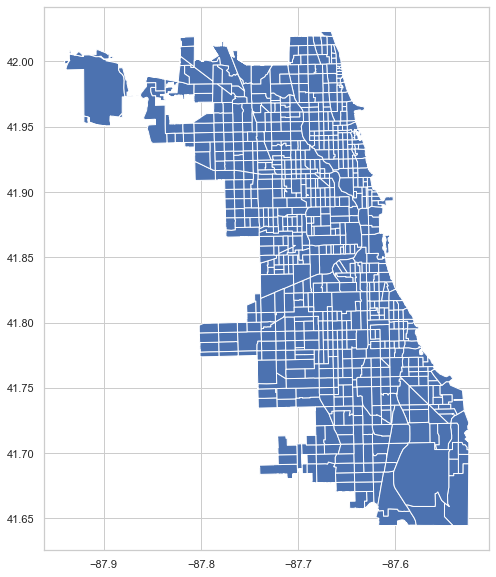

In [8]:
plt.rcParams['figure.figsize'] = [30, 10] #height, width
chi_inc.plot()

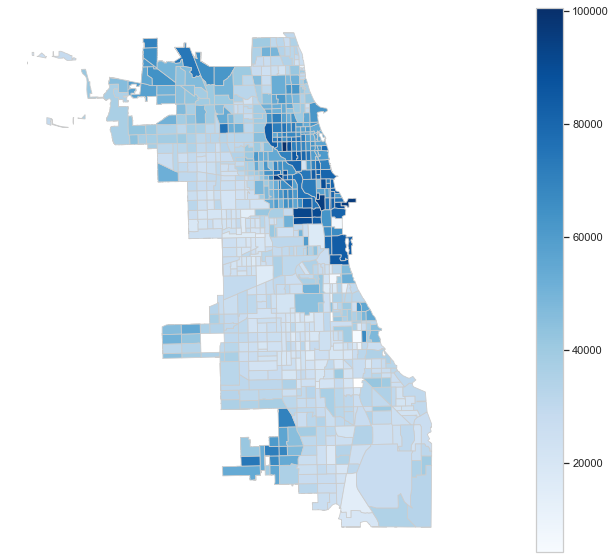

In [9]:
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))

ax.axis("off")

chi_inc.plot(column='med_earn', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)



In [10]:
type(chi_inc)

geopandas.geodataframe.GeoDataFrame

In [11]:
chi_medearn = chi_inc['med_earn']

print(chi_medearn, type(chi_medearn))

0      32321.0
1      34671.0
2      54606.0
3      62745.0
4      25571.0
        ...   
865    31359.0
866    50885.0
867    35464.0
868    54734.0
869    43214.0
Name: med_earn, Length: 870, dtype: float64 <class 'pandas.core.series.Series'>


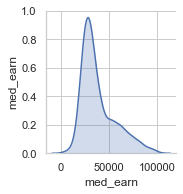

In [12]:
_ = sns.pairplot(chi_inc, kind='reg', diag_kind='kde')

Looking into the documentation https://seaborn.pydata.org/generated/seaborn.pairplot.html, as there's only one variable under consideration, the result is just a univariate plot. Let's move on to the actual clustering!

## Kmeans clustering -- was unsuccessful

I tried this with two separate models. If you'd like to see the setup of those models (and perhaps find where I went wrong?) see the inc_clustering_with_pysal file in the project repository.

## new goals

Based on resources I could find online, I think the following two goals are do-able:

- 

In [13]:
chi_inc

,med_earn,city_name,geometry
0,32321.0,chi,"POLYGON ((-87.62433 41.74365, -87.62417 41.736..."
1,34671.0,chi,"POLYGON ((-87.59062 41.72952, -87.58871 41.726..."
2,54606.0,chi,"POLYGON ((-87.64060 41.95364, -87.64074 41.953..."
3,62745.0,chi,"POLYGON ((-87.64180 41.93498, -87.64139 41.934..."
4,25571.0,chi,"POLYGON ((-87.72286 41.78230, -87.72276 41.778..."
...,...,...,...
865,31359.0,chi,"POLYGON ((-87.67790 41.74288, -87.67725 41.741..."
866,50885.0,chi,"POLYGON ((-87.80122 41.78476, -87.80122 41.784..."
867,35464.0,chi,"MULTIPOLYGON (((-87.68070 41.67726, -87.68070 ..."
868,54734.0,chi,"POLYGON ((-87.78201 41.79967, -87.78203 41.799..."


**Max Income**

In [24]:
np.max(chi_inc['med_earn'])

100508.0

In [25]:
chi_inc_max = chi_inc.loc[chi_inc['med_earn'] == 100508.0]

In [26]:
print(chi_inc_max, type(chi_inc_max))

     med_earn city_name                                           geometry
615  100508.0       chi  POLYGON ((-87.67824 41.93593, -87.67813 41.932... <class 'geopandas.geodataframe.GeoDataFrame'>


*Centroid*

In [27]:
chimax_geom = chi_inc_max["geometry"]

In [28]:
type(chimax_geom)

geopandas.geoseries.GeoSeries

In [30]:
chimax_geom.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

This is what we want it to be!

In [31]:
chimax_loc = chimax_geom.centroid

<ipython-input-31-0e75d5d82cdb>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  chimax_loc = chimax_geom.centroid


**Min Income**

In [21]:
chimin = np.min(chi_inc['med_earn'])

In [22]:
chi_inc_min = chi_inc.loc[chi_inc['med_earn'] == chimin]

In [23]:
print(chi_inc_min, type(chi_inc_max))

     med_earn city_name                                           geometry
472    4292.0       chi  POLYGON ((-87.60604 41.78587, -87.60119 41.785... <class 'geopandas.geodataframe.GeoDataFrame'>


In [32]:
chimin_geom = chi_inc_min["geometry"]

In [33]:
chimin_loc = chimin_geom.centroid

<ipython-input-33-5f09d68d8f21>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  chimin_loc = chimin_geom.centroid


In [35]:
chimin_loc

472    POINT (-87.60128 41.79047)
dtype: geometry

In [ ]:
fig, gax = plt.subplots(figsize=(30,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("continent == 'South America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('South America')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

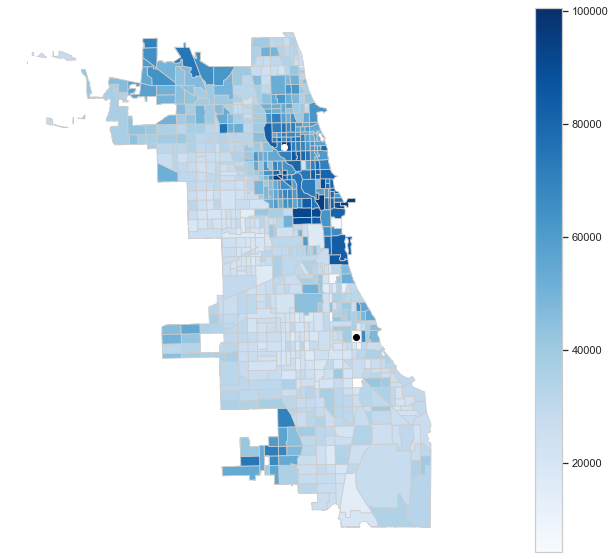

In [61]:
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))

ax.axis("off")

chi_inc.plot(column='med_earn', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True) 
chimin_loc.plot(ax=ax, color='black', alpha = 1)
chimax_loc.plot(ax=ax, color='white', alpha = 1)

plt.show


Distance calculation. (Pulling in the function from: http://darribas.org/gds_scipy16/ipynb_md/01_data_processing.html)

In [62]:
from math import radians, sin, cos, sqrt, asin

def gcd(loc1, loc2, R=3961):
    """Great circle distance via Haversine formula

    Parameters
    ----------

    loc1: tuple (long, lat in decimal degrees)

    loc2: tuple (long, lat in decimal degrees)

    R: Radius of the earth (3961 miles, 6367 km)

    Returns
    -------
    great circle distance between loc1 and loc2 in units of R


    Notes
    ------
    Does not take into account non-spheroidal shape of the Earth



    >>> san_diego = -117.1611, 32.7157
    >>> austin = -97.7431, 30.2672
    >>> gcd(san_diego, austin)
    1155.474644164695


    """
    lon1, lat1 = loc1
    lon2, lat2 = loc2
    dLat = radians(lat2 - lat1)
    dLon = radians(lon2 - lon1)
    lat1 = radians(lat1)
    lat2 = radians(lat2)

    a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
    c = 2*asin(sqrt(a))

    return R * c


In [71]:
chimin_loc

472    POINT (-87.60128 41.79047)
dtype: geometry

In [73]:
chimax_loc

615    POINT (-87.67587 41.93595)
dtype: geometry

In [74]:
# ok, there's got to be a better way to do this, however:
cmin = [-87.60128, 41.79047]
cmax = [-87.67587, 41.93595]

In [75]:
gcd(cmin, cmax)

10.765650737050473

So the distance between the tract with the highest income in Chicago, and the tract with the lowest income in Chicago, is about 11 miles. 

***Rinse and Repeat***

## Minneapolis